<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only have one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.

<span style="color:blue">
    
### Group Number :  010

### Student IDs: u6284513, u6474528 (and u6485573)

</span>

## Introduction



In [188]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [189]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix

***

## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  actor                   |  actors data including first name and last name     |
|  film                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  category                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  store                   |  store data including manager staff and address |
|  inventory               |  stores inventory data |
|  rental                  |  stores rental data |
|  payment                 |  stores customer's payments |
|  staff                   |  stores staff data |
|  customer                |  stores customer data |
|  address                 |  address data for staff and customers |
|  city                    |  stores city data |
|  country                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>

Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 

***
#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [22]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

In [23]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [24]:
# YOUR QUERY HERE
query = "SELECT sum(amount) \"Total Rental Cost\" from film AS f" + "\n"\
"join inventory i on f.film_id = i.film_id" + "\n"\
"join rental r on i.inventory_id = r.inventory_id" + "\n"\
"join payment AS p on r.rental_id = p.rental_id"+ "\n"\
"where f.title = 'Affair Prejudice' and i.store_id = 2 ;"

execute_sql(query)

,Total Rental Cost
0,33.91


### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [25]:
# YOUR QUERY HERE

query = "SELECT DISTINCT c.first_name,c.last_name FROM customer c" + "\n"\
"JOIN rental r ON c.customer_id = r.customer_id" + "\n"\
"JOIN inventory AS i ON r.inventory_id = i.inventory_id" + "\n"\
"JOIN film AS f ON i.film_id = f.film_id" + "\n"\
"WHERE i.store_id = 1 AND f.title = 'Affair Prejudice'"

execute_sql(query)

,first_name,last_name
0,Carmen,Owens
1,Danielle,Daniels
2,Eleanor,Hunt
3,Jeff,East
4,Jordan,Archuleta
5,Megan,Palmer
6,Michael,Silverman
7,Minnie,Romero
8,Natalie,Meyer
9,Nina,Soto


### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [26]:
# YOUR QUERY HERE

query = "SELECT c.customer_id,c.first_name,c.last_name FROM customer AS c" +"\n"\
"JOIN payment AS p" + "\n"\
"ON c.customer_id = p.customer_id"+"\n"\
"GROUP BY c.customer_id" + "\n"\
"HAVING SUM(amount)>100;"

execute_sql(query)

,customer_id,first_name,last_name
0,87,Wanda,Patterson
1,477,Dan,Paine
2,273,Priscilla,Lowe
3,550,Guy,Brownlee
4,51,Alice,Stewart
5,190,Yolanda,Weaver
6,424,Kyle,Spurlock
7,406,Nathan,Runyon
8,176,June,Carroll
9,576,Morris,Mccarter


### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [27]:
# YOUR QUERY HERE
query = "SELECT DISTINCT c.customer_id,c.first_name,c.last_name FROM customer c" + "\n"\
"JOIN rental AS r ON c.customer_id = r.customer_id" + "\n"\
"JOIN inventory AS i ON r.inventory_id = i.inventory_id" + "\n"\
"JOIN film AS f ON i.film_id = f.film_id" + "\n"\
"WHERE (i.store_id BETWEEN 1 AND 2) AND f.title = 'Angels Life'" + "\n"\
"GROUP BY c.customer_id" + "\n"\
"HAVING COUNT(i.store_id)=2;"
# count the number of store_id which equals 2
execute_sql(query)

,customer_id,first_name,last_name
0,163,Cathy,Spencer


***

## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [28]:
# YOUR CODE HERE
# section C 1.2
customer_film = "SELECT DISTINCT c.customer_id,f.rating,f.rental_rate,fc.category_id" + "\n"\
"FROM film f JOIN inventory i ON f.film_id = i.film_id" + "\n"\
"JOIN rental r ON i.inventory_id = r.inventory_id " + "\n"\
"JOIN customer c ON c.customer_id = r.customer_id" + "\n"\
"JOIN film_category fc ON f.film_id = fc.film_id;"
df_customer_film = execute_sql(customer_film)
number1 = LabelEncoder()
# use label encoder to transform rating string to a specific id 
number1.fit(df_customer_film.rating)
df_customer_film['rating']=number1.transform(df_customer_film['rating']) 
df_customer_film = df_customer_film.drop(['customer_id'],axis=1)

# section C part 2
film_rate = "SELECT f.rating,f.rental_rate,f.rental_duration,f.length,f.replacement_cost,a.actor_id,c.category_id" + "\n"\
"FROM Film f JOIN" + "\n"\
"Film_actor a ON f.film_id = a.film_id JOIN" + "\n"\
"Film_category c ON f.film_id = c.film_id;"
df_film_rate = execute_sql(film_rate)
number2 = LabelEncoder()
# use label encoder to transform rating string to a specific id 
number2.fit(df_film_rate.rental_rate) 
df_film_rate['rental_rate']=number2.transform(df_film_rate['rental_rate'])
number2.fit(df_film_rate.rating)
df_film_rate['rating']=number2.transform(df_film_rate['rating']) 
df_film_rate.head(10)

,rating,rental_rate,rental_duration,length,replacement_cost,actor_id,category_id
0,2,0,6,86,20.99,1,6
1,4,0,3,92,9.99,1,2
2,0,1,3,74,15.99,1,13
3,0,1,4,61,14.99,1,10
4,0,0,6,87,23.99,1,14
5,0,1,6,149,19.99,1,4
6,3,2,4,126,24.99,1,11
7,1,1,5,89,25.99,1,15
8,1,1,3,68,22.99,1,10
9,1,2,3,184,24.99,1,8


***

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [29]:
## Import csv files for home development here as necessary. 
homework_actor = pd.read_csv("data/dvd_rental/actor.csv")
# read in other csvs as necessary.

### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

*It is possible to use decision tree to perform clustering. The main idea is to partition the data making the decision tree algorithm work for clustering. Non-existing points are introduced to the data space, and also a new purity function is designed to capture the natural distribution of the data without making any prior assumptions. Additionally, a pruning method is needed to find relatively useful clusters after the tree is built. The result is presented as a list of hyper-rectangular regions.*

#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

*It depends on the random state. If the random state is none, the k-means algorithm does not exactly generate the same result every time because it manually selects the k value and initializes the random centroid.If the random state is provided, random_state is the seed used by the random number generator.*

### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

In [30]:
mms = MinMaxScaler()
mms.fit(df_customer_film)
data_transformed = mms.transform(df_customer_film)

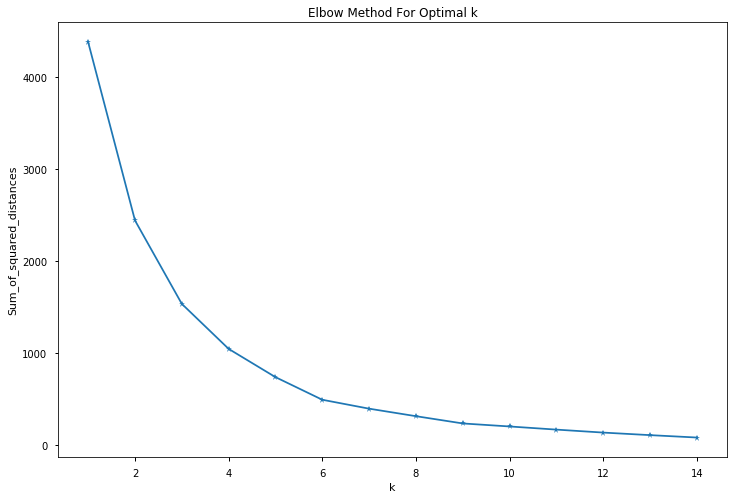

In [31]:
data_transformed = pd.DataFrame(data_transformed,columns=['rating','rental_rate','category_id']) 
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(data_transformed)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_reduced)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize = (12,8))
plt.plot(K, Sum_of_squared_distances, '*-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

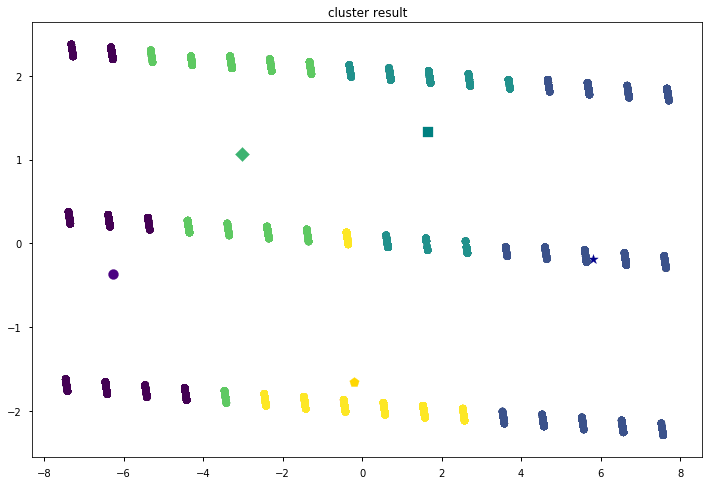

In [32]:
# YOUR CODE HERE
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_customer_film)
km = KMeans(n_clusters = 5,random_state = 41)  
km.fit(df_reduced)
plt.figure(figsize = (12,8))
markers = ['o','*','s','D','p']
colors = ['indigo','darkblue','teal','mediumseagreen','gold','gold']
centers = km.cluster_centers_

for ind in range(5):
    plt.scatter(centers[ind,0],centers[ind,1],c=colors[ind],s=100,marker = markers[ind])
    
plt.scatter(df_reduced[:,0],df_reduced[:,1],c=km.labels_,s=50)
plt.title("cluster result")
plt.show()

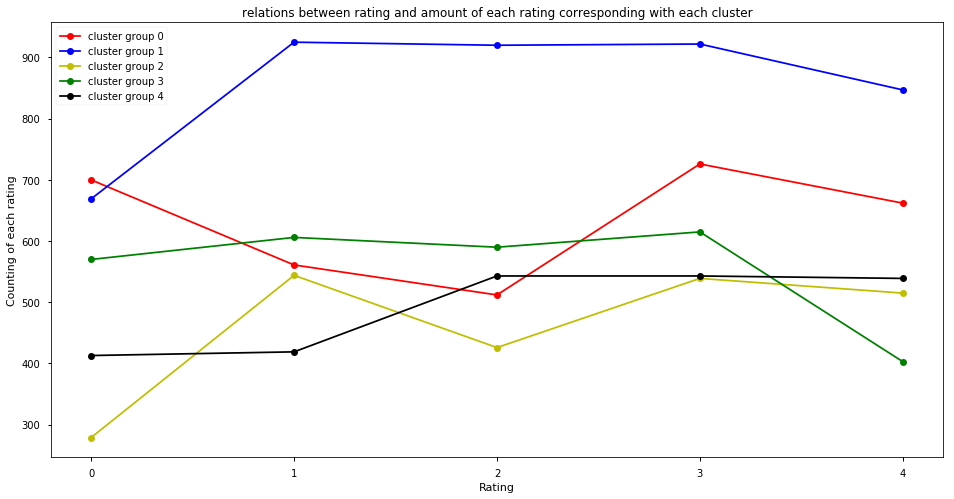

In [33]:
df_customer_film['Label'] = km.labels_
# create a new column showing clustering labels
df_label_0 = df_customer_film[df_customer_film['Label'] == 0]
df_label_1 = df_customer_film[df_customer_film['Label'] == 1]
df_label_2 = df_customer_film[df_customer_film['Label'] == 2]
df_label_3 = df_customer_film[df_customer_film['Label'] == 3]
df_label_4 = df_customer_film[df_customer_film['Label'] == 4]
rating_0 = df_label_0.groupby('rating').size()
rating_1 = df_label_1.groupby('rating').size()
rating_2 = df_label_2.groupby('rating').size()
rating_3 = df_label_3.groupby('rating').size()
rating_4 = df_label_4.groupby('rating').size()
plt.figure(figsize=(16,8))
plt.plot(range(0,5),rating_0,c='r',marker='o', label='cluster group 0')
plt.plot(range(0,5),rating_1,c='b',marker='o', label='cluster group 1')
plt.plot(range(0,5),rating_2,c='y',marker='o', label='cluster group 2')
plt.plot(range(0,5),rating_3,c='g',marker='o', label='cluster group 3')
plt.plot(range(0,5),rating_4,c='black',marker='o', label='cluster group 4')
plt.xlabel("Rating")
plt.ylabel("Counting of each rating")
plt.xticks(range(5))
plt.legend(loc='upper left')
plt.title("relations between rating and amount of each rating corresponding with each cluster")
plt.show()

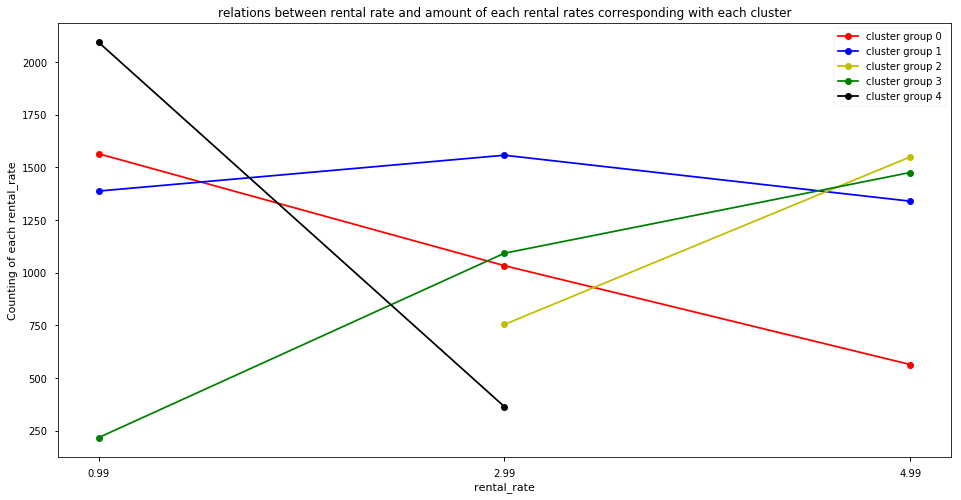

In [34]:
rental_0 = df_label_0.groupby('rental_rate').size()
rental_1 = df_label_1.groupby('rental_rate').size()
rental_2 = df_label_2.groupby('rental_rate').size()
rental_3 = df_label_3.groupby('rental_rate').size()
rental_4 = df_label_4.groupby('rental_rate').size()
plt.figure(figsize=(16,8))
xticks = [0.99,2.99,4.99]
plt.plot(xticks,rental_0,c='r',marker='o', label='cluster group 0')
plt.plot(xticks,rental_1,c='b',marker='o', label='cluster group 1')
plt.plot([2.99,4.99],rental_2,c='y',marker='o', label='cluster group 2')
plt.plot(xticks,rental_3,c='g',marker='o', label='cluster group 3')
plt.plot([0.99,2.99],rental_4,c='black',marker='o', label='cluster group 4')
plt.xlabel("rental_rate")
plt.ylabel("Counting of each rental_rate")
plt.xticks(np.arange(min(xticks), max(xticks)+1, 2.0))
plt.legend(loc='upper right')
plt.title("relations between rental rate and amount of each rental rates corresponding with each cluster")
plt.show()

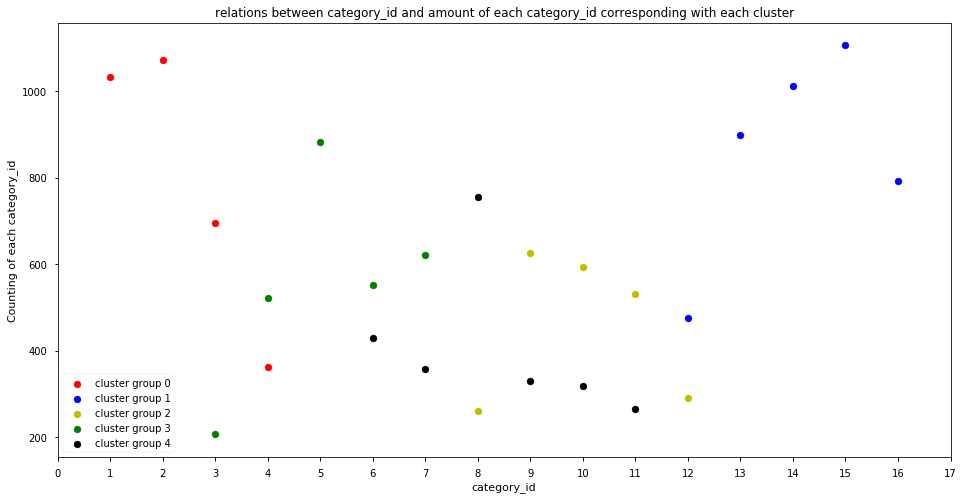

In [35]:
cate_0 = df_label_0.groupby('category_id').size()
cate_1 = df_label_1.groupby('category_id').size()
cate_2 = df_label_2.groupby('category_id').size()
cate_3 = df_label_3.groupby('category_id').size()
cate_4 = df_label_4.groupby('category_id').size()
plt.figure(figsize=(16,8))
plt.scatter(x = cate_0.index,y = cate_0,label = "cluster group 0",c = 'r')
plt.scatter(x = cate_1.index,y = cate_1,label = "cluster group 1",c = 'b')
plt.scatter(x = cate_2.index,y = cate_2,label = "cluster group 2",c = 'y')
plt.scatter(x = cate_3.index,y = cate_3,label = "cluster group 3",c= 'g')
plt.scatter(x = cate_4.index,y = cate_4,label = "cluster group 4", c = 'black')
plt.xlabel("category_id")
plt.ylabel("Counting of each category_id")
plt.legend()
plt.title("relations between category_id and amount of each category_id corresponding with each cluster")
plt.xticks(range(18))
plt.show()

#### <span style="color:blue"> Your justifications & commentary here: </span>

We use line chart to discover the relation between features and their sizes corresponding with each cluster. Firstly we seperate the whole dataframe to 5 small dataframes and then plot the graph using these small dataframes.

#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

#### 1) rating
In the first graph, cluster group 1 has the largest number of people in almost all different ratings. Cluster group 2 seems contain fewer children due to the less number of people who rent movie of rating 0. People in cluster group 3 have more Minor people than other cluster groups because the rating 4 is pretty low compared to other rating value in cluster group 3.
#### 2)rental_rate
In the second graph, people in cluster group 4 cannot afford expensive rental rate. In contrast, people in cluster 2 are not willing to buy cheap movies. People in cluster 0 choose cheaper movies in most of the cases. On the other hand, people in cluster 3 prefer to choose more expensive movies.
#### 3)category_id
In the third graph, the movies belong to cluster 1 are most popular and category 12 in cluster 1 is least popular. Movies in cluster 0 are less popular than movies in cluster 1 and category 4 in cluster 1 is the least popular. Cluster 3 and Cluster 2 almost have the same popularity.

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [36]:
# YOUR CODE HERE
dt_target = df_film_rate['rental_rate']
dt_features = df_film_rate.drop('rental_rate',axis=1)
dtx_train, dtx_test, dty_train, dty_test = train_test_split(dt_features,dt_target,test_size=0.2,random_state=42)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(dtx_train,dty_train)
y_pred = dt_classifier.predict(dtx_test)
dt_score = dt_classifier.score(dtx_test,dty_test)
print("The Mean Accuracy is",dt_score)
print("The Mean Absolute Error is",skm.mean_absolute_error(dty_test,y_pred))
print("The Mean Squared Error is",skm.mean_squared_error(dty_test,y_pred))
print("The RMSE is",np.sqrt(skm.mean_squared_error(dty_test,y_pred)))
print("The r squred score is ",skm.r2_score(dty_test,y_pred))
print("The F1 score is",skm.f1_score(dty_test,y_pred,average='macro'))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

The Mean Accuracy is 0.9725526075022873
The Mean Absolute Error is 0.03293687099725526
The Mean Squared Error is 0.04391582799634035
The RMSE is 0.2095610364460444
The r squred score is  0.9350183188293785
The F1 score is 0.9725037731132181


[[0.96833773 0.02259887 0.01111111]
 [0.01583113 0.96892655 0.01388889]
 [0.00527704 0.01412429 0.98055556]]


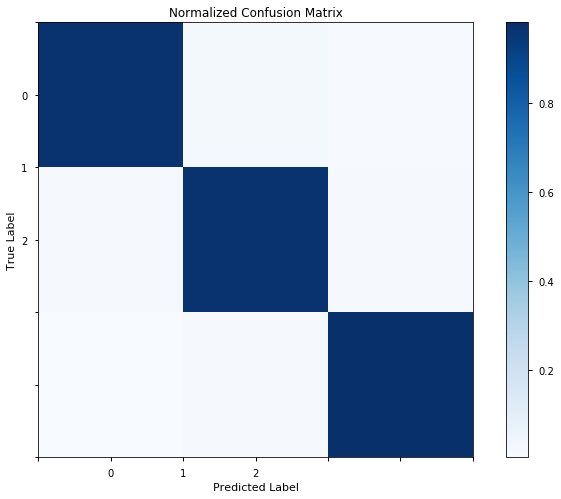

In [37]:
labels = [0,1,2]
cm = confusion_matrix(dty_test,y_pred,labels)
cm = cm/cm.astype(np.float).sum(axis=1)
print(cm)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
# colorax = ax.matshow(cm)
# fig.colorbar(colorax)
im = ax.imshow(cm,interpolation ='nearest',cmap = plt.cm.Blues)
ax.figure.colorbar(im,ax=ax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Normalized Confusion Matrix")
plt.show()

#### <span style="color:blue"> Your justifications & commentary here: </span>
The reasons why we choose those features:
<br>We chose rating, rental_duration, length, replacement_cost, actor_id and category_id beacuse these features might influence the rental_rate, which determines the price tag. More specifically, replacement_cost has a direct connection with the rental_rate because replacement_cost means the amount that an entity would have to pay to replace an asset at the present time, according to its current worth(From Wikipedia). Also, other factors such as the rating of the film, the duration, the length of the movie, the category of the film and the actor in the movie might influence the rental_rate, then affect the price tag.
<br>The statistical metrics we have used:
<br>Mean Accuracy:The average ratio number of correct predictions to the total number of input samples. The value above shows high accuracy of this model.
<br>MAE:It calculates an average of absolute differences between the target values and the predictions. The value above means the model is pretty good.
<br>MSE:It calculates square difference between the predictions and the target and then average those values. In this case, the value above means the model is quite good.
<br>RMSE: It is the root of the MSE and the purpose is pretty the same as the MSE.
<br>R^2:R^2 is the ratio between how good the model is vs how good is the naive mean model.In this case, the value above means the model is quite perfect to fit the data.
<br>F1 (F-score | F-measure):
<br>Confusion Matrix: it is a table that depicts the performance of a supervised machine learning model. In this part, it can be manifest that the block on the diagnal is darker than any other parts which implements that the model is accurate.

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

*Clustering can be used as a pre-processing step before Classification. It is not always feasible to apply classification algorithms directly on dataset. Clustering methods such as K-means clustering can be used to label new data for each datatime. Classification requires labeled samples from a set of classes. Therefore, by clustering the data and saving the resulting cluster label and using these tags as target variables to train the classifiers can seperate the steps of clustering and classification effectively.
What is more, with the help of clustering can filter out the obvious cases and eliminate the noisy data or non-obvious data in order to have a simpler data to work with.*

***

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split it on a range of values (to convert it to a categorical variable, for example).
* Attribute selection in the tree uses information gain.
* You can use LaTeX and/or markdown to format your equations.

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>

Entropy(cloudy) = Entropy(3,9) = Entropy(0.25,0.75)= -0.25*log<sub>2</sub><sup>0.25</sup>-0.75log<sub>2</sub><sup>0.75</sup> = 0.81

#### 2. Which attribute would the decision-tree building algorithm choose at the root of the tree?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>

The gain of the clody attribute is 0.41 which is bigger than other attributes. As choosing attribute with the largest information gain as the decision node, so we choose cloudy as the root of tree. 


gain information for other attributes are all less then 0.41
<br>
Info<sub>UV index</sub>(Rain)= $\frac{6}{12}\times(-\frac{3}{6}\times$log<sub>2</sub> ${\frac{3}{6}}-\frac{3}{6}\times$log<sub>2</sub> ${\frac{3}{6}})$ + $\frac{4}{12}\times(-\frac{2}{4}\times$log<sub>2</sub> $\frac{2}{4}-\frac{2}{4}\times$log<sub>2</sub> $\frac{2}{4})$ + $\frac{2}{12}\times0$=$\frac{5}{6}$
<br>
Gain<sub>UV index</sub> = Info(Rain)-Info<sub>UV index</sub>(Rain) = 0.15
<br>
<br>
Info<sub>Humidity</sub>(Rain)= $\frac{6}{12}\times(-\frac{3}{6}\times$log<sub>2</sub> ${\frac{3}{6}}-\frac{3}{6}\times$log<sub>2</sub> ${\frac{3}{6}})$ + $\frac{4}{12}\times(-\frac{2}{4}\times$log<sub>2</sub> $\frac{2}{4}-\frac{2}{4}\times$log<sub>2</sub> $\frac{2}{4})$ + $\frac{2}{12}\times0$=$\frac{5}{6}$
<br>
Gain<sub>Humidity</sub> = Info(Rain)-Info<sub>Humidity</sub>(Rain) = 0.15
<br>
for temp attribute,we use temp of 27 as the demarcation point  
<br>
Therefore:
<br>
Info<sub>temp</sub>(Rain)= $\frac{5}{12}\times(-\frac{1}{5}\times$log<sub>2</sub> ${\frac{1}{5}}-\frac{4}{5}\times$log<sub>2</sub> ${\frac{4}{5}})$ + $\frac{7}{12}\times(-\frac{3}{7}\times$log<sub>2</sub> $\frac{3}{7}-\frac{4}{7}\times$log<sub>2</sub> $\frac{4}{7})$ = 0.87
<br>
Gain<sub>temp</sub> = Info(Rain)-Info<sub>temp</sub>(Rain) = 0.11

#### 3. Calculate and specify the information gain of the attribute you chose to split on in the previous question

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>

Due to ID3 Algorithms:
<br>
Info(Rain) =  Entropy(5,7) = Entropy(0.42,0.58)= -0.42*log<sub>2</sub><sup>0.42</sup>-0.58log<sub>2</sub><sup>0.58</sup> = 0.98
<br>
Info<sub>cloudy</sub>(Rain)= $\frac{3}{12}\times(-\frac{3}{3}\times$log<sub>2</sub> ${\frac{3}{3}})$ + $\frac{9}{12}\times(-\frac{7}{9}\times$log<sub>2</sub> $\frac{7}{9}-\frac{2}{9}\times$log<sub>2</sub> $\frac{2}{9})$ = 0.57
<br>
Gain<sub>cloudy</sub> = Info(Rain)-Info<sub>cloudy</sub>(Rain) = 0.41
<br>

the gain of the clody attribute is 0.41